In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import pickle

In [3]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri

In [6]:
pd.DataFrame(out[case][constant_use][static][transfer])

,6.0,7.0,8.0,9.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
dw,1.243869,1.242649,1.266671,1.266671,1.268748,1.261424,1.222241,1.189314,1.201501,1.206894,1.182649,1.195225,1.177463,1.196397
fridge,9.807406,10.021869,9.296165,9.296165,8.525354,9.117668,7.897208,8.486117,7.578240,7.567822,7.560282,7.099928,7.873403,6.971554
hvac,25.163225,25.088874,27.750673,27.750673,25.385422,21.833646,20.847899,21.876632,20.878963,20.197037,19.886370,20.101711,20.654703,20.259572
mw,2.556328,2.563816,2.504340,2.504340,2.428496,2.431994,2.362648,2.431543,2.335138,2.310357,2.321019,2.302552,2.418280,2.315697
oven,2.019732,2.162994,2.266188,2.266188,2.139235,2.180604,2.188105,2.113906,2.125882,2.112487,2.045796,1.973395,2.137723,2.038095
wm,2.181693,2.199575,2.195311,2.195311,2.175702,2.174387,2.134032,2.153652,2.134614,2.140550,2.121188,2.119268,2.146652,2.116127


In [10]:
enumerate(APPLIANCES_ORDER).next()

(0, 'aggregate')

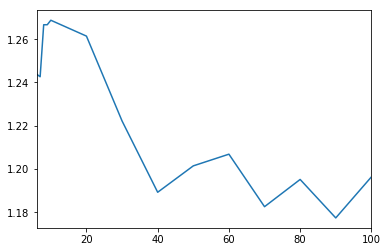

In [18]:
error.loc['dw'].plot()

'the label [hvac] is not in the [index]'
2 False normal ------
'the label [hvac] is not in the [index]'
2 False transfer ------
'the label [hvac] is not in the [index]'
2 False normal ------
'the label [hvac] is not in the [index]'
2 False transfer ------
'the label [hvac] is not in the [index]'
4 False normal ------
'the label [hvac] is not in the [index]'
4 False transfer ------


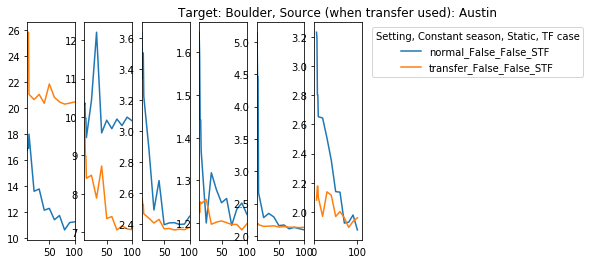

In [21]:
out = pickle.load(open('../predictions/lr-tf-Austin-Boulder.pkl','r'))
fig, ax = plt.subplots(ncols=6)
mapping = {2:'Our TF', 4:'STF'}
for case in [2, 4]:
    for constant_use in ['True', 'False']:
        static = 'False'
        for transfer in ['normal','transfer']:
            try:
                algo = "{}_{}_{}_{}".format(transfer, constant_use, static, mapping[case])
                error = pd.DataFrame(out[case][constant_use][static][transfer])
                for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
                    error.loc[appliance].plot(ax=ax[i], label=algo, legend=False)
            except Exception, e:
                print e
                print case, static, transfer, "------"
#prev_best_algo.plot(label='prev', marker='*')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant season, Static, TF case')
plt.xlim((0, 110))
plt.title("Target: Boulder, Source (when transfer used): Austin")

In [54]:
params = pickle.load(open('../predictions/params-lr-tf-Austin-SanDiego.pkl','r'))


In [115]:
case =2
constant_use = 'True'
static = 'True'
setting = 'transfer'
lrs = {}
n_iter = {}
for train in [10, 30, 50, 70, 90]:
    lrs[train] = []
    n_iter[train] = []
    for random_seed in range(4):
        for fold in range(10):
            lrs[train].append(params[case][constant_use][static][setting][train][random_seed][fold]['Learning Rate'])
            n_iter[train].append(params[case][constant_use][static][setting][train][random_seed][fold]['Iterations'])
    lrs[train] = pd.value_counts(pd.Series(lrs)[train])
    n_iter[train] = pd.value_counts(pd.Series(n_iter)[train])
lrs = pd.DataFrame(lrs)
n_iter = pd.DataFrame(n_iter)

In [117]:
pd.DataFrame(n_iter)

,10,30,50,70,90
100,4,10,11,8,13
700,10,12,12,15,5
1300,26,18,17,17,22


In [100]:
lr_optimal = {}
for train in [10, 30, 50, 70, 90]:
    lr_optimal[train] = pd.value_counts(pd.DataFrame(a)[train])
    

In [ ]:
pd.DataFrame(lrs).T.plot(kind='bar', rot=0)
plt.xlabel("% Training data")
plt.title("Histogram of optimal Learning Rate for \n Our TF Transfer from Austin ->SD")
plt.legend(title="Learning rate")

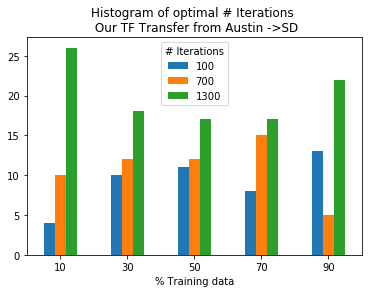

In [126]:
pd.DataFrame(n_iter).T.plot(kind='bar', rot=0)
plt.xlabel("% Training data")
plt.title("Histogram of optimal # Iterations \n Our TF Transfer from Austin ->SD")
plt.legend(title="# Iterations")